In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

!ls

Mounted at /content/gdrive/
gdrive	sample_data


In [1]:
!pip install tqdm
from tqdm import tqdm

import os
import numpy as np

data_dir = '/content/gdrive/My Drive/AYield/China/HISTOGRAM'
data_dir = '/hy-tmp'

os.chdir(data_dir)

!pwd
!ls

Looking in indexes: https://mirrors.aliyun.com/pypi/simple
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.
/hy-tmp
china  corn_histogram_all_augmented.npz  corn_histogram_all_full.npz  rnn


In [2]:
CROP = 'corn'
path_to_histogram = f'{CROP}_histogram_all_full.npz'

images = locations = yields = years = indices = areas = []

with np.load(path_to_histogram) as hist:
    images = hist["output_image"]
    locations = hist["output_locations"]
    yields = hist["output_yield"]
    years = hist["output_year"]
    indices = hist["output_index"]
    areas = hist["output_areas"]
    
    print(type(hist["output_image"][0][0][0][0]))
    print(type(hist["output_locations"][0][0]))
    print(type(hist["output_yield"][0]))
    print(type(hist["output_year"][0]))
    print(type(hist["output_index"][0][0]))
    print(type(hist["output_areas"][0]))
    
    
print('areas:', list(areas))

# fn

# print('years : ', years)
print(images.shape, locations.shape, yields.shape, years.shape, indices.shape, areas.shape)
# fn
hists = []
img = np.empty( shape=[0,images.shape[1],images.shape[2],images.shape[3]] )
loc = np.empty( shape=[0, locations.shape[1]] )
yie = np.empty( shape=[0,] )
yea = np.empty( shape=[0,] )
ind = np.empty( shape=[0, indices.shape[1]] )
are = np.empty( shape=[0,] )
# img = np.repeat(np.expand_dims(images[0,...], axis=0), 4, axis=0)
print('img:', img.shape, areas[0])
print('output_image : ', type(images), images.shape, indices.shape)
for ii in tqdm(range(0,indices.shape[0],1)):
    
    if areas[ii] > 100:
        areas[ii] = 100
        
    img = np.concatenate((img, np.repeat(np.expand_dims(images[ii,...], axis=0), areas[ii], axis=0)), axis=0)
    loc = np.concatenate((loc, np.repeat(np.expand_dims(locations[ii,...], axis=0), areas[ii], axis=0)), axis=0)
    yie = np.concatenate((yie, np.repeat(np.expand_dims(yields[ii,...], axis=0), areas[ii], axis=0)), axis=0)
    yea = np.concatenate((yea, np.repeat(np.expand_dims(years[ii,...], axis=0), areas[ii], axis=0)), axis=0)
    ind = np.concatenate((ind, np.repeat(np.expand_dims(indices[ii,...], axis=0), areas[ii], axis=0)), axis=0)
    
  # print(':', indices[ii,1], years[ii], areas[ii], yields[ii])
  # if areas[ii] > 4000:
  #   areas[ii] = areas[ii] // 16 #150
  # elif areas[ii] > 1000
  #   areas[ii] = 
  # elif areas[ii] > 190:
  #   areas[ii] = areas[ii] // 2 #100

print('huh img: ', img.shape, loc.shape, yie.shape, yea.shape, ind.shape)

images = img
locations = loc
yields = yie
years = yea.astype(np.int64)
indices = ind.astype(np.int64)

print(type(images[0][0][0][0]))
print(type(locations[0][0]))
print(type(yields[0]))
print(type(years[0]))
print(type(indices[0][0]))

np.savez(
    f"{CROP}_histogram_all_augmented.npz",
    output_image = images,
    output_yield = yields,
    output_year = years,
    output_locations = locations,
    output_index = indices,
)
print(f"Finished generating image augmentation for {CROP}!")

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
areas: [97, 78, 61, 54, 52, 50, 48, 49, 52, 55, 64, 83, 96, 114, 147, 183, 58, 54, 53, 48, 45, 46, 44, 43, 43, 40, 38, 36, 34, 33, 36, 39, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 8, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 5, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1593, 1765, 1719, 1882, 1840, 1957, 1632, 1496, 1533, 1646, 1688, 1511, 1696, 1854, 2429, 4066, 16, 18, 19, 19, 18, 17, 16, 16, 16, 16, 15, 14, 13, 13, 13, 14, 11, 11, 10, 11, 10, 10, 9, 8, 7, 7, 7, 6, 6, 6, 6, 6, 199, 194, 188, 221, 227, 228, 238, 241, 243, 244, 248, 257, 265, 280, 274, 255, 420, 512, 445, 499, 503, 461, 349, 305, 302, 290, 282, 261, 231, 206, 206, 210, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 21, 20, 18, 17, 16, 15, 13, 12, 12, 11, 11, 9, 9, 9, 9, 9, 25, 26, 26, 37, 33, 30, 25, 24, 21, 20, 20, 20, 20

100%|██████████| 320/320 [15:06<00:00,  2.83s/it]


huh img:  (9078, 9, 32, 512) (9078, 2) (9078,) (9078,) (9078, 2)
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
Finished generating image augmentation for corn!


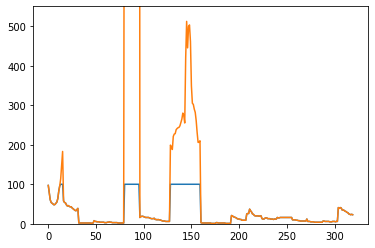

In [3]:
from matplotlib import pyplot as plt

X = [X for X in range(0, len(areas))]

plt.plot(X, areas)

with np.load(path_to_histogram) as hist:
    ars = hist["output_areas"]
    
plt.plot(X, ars)

plt.ylim([0, 550])

plt.show()
